In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis



In [172]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [173]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

## Kaplan Meier

Text(0.5, 0, 'time $t$')

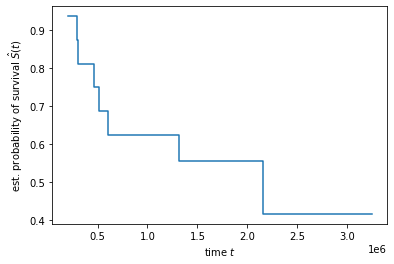

In [174]:
time, survival_prob = kaplan_meier_estimator(data_y["Observed"], data_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

## Kaplan Meier by 'age' i.e. cycle at NDE

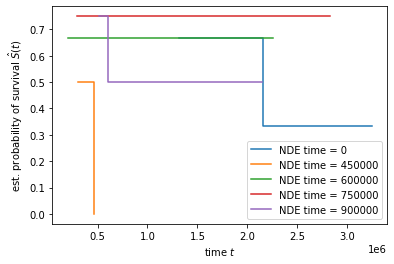

In [176]:
for age in [0, 450000, 600000, 750000, 900000]:
    mask_treat = data_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["Observed"][mask_treat],
        data_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

## Structured array for Cox

In [177]:
data_y_num = data_y.to_records(index=False)

## Cox survival analysis

In [178]:
estimator = CoxPHSurvivalAnalysis(alpha=0.0000001, verbose=2)
estimator.fit(data_x, data_y_num)

iter      1: loss = 0.2735597685
iter      2: loss = 0.1125178944
iter      3: loss = 0.0492022581
iter      4: loss = 0.0228681056
iter      5: loss = 0.3838228071
iter      4: loss increased, performing step-halving. loss = 0.0329107245
iter      6: loss = 0.0149345735
iter      7: loss = 0.0079678768
iter      8: loss = 0.0058380946
iter      9: loss = 0.0051705976
iter     10: loss = 0.0048391636
iter     11: loss = 0.0046300913
iter     12: loss = 0.0044254426
iter     13: loss = 11.0045282263
iter     12: loss increased, performing step-halving. loss = 0.0045029132
iter     14: loss = 0.5911439889
iter     13: loss increased, performing step-halving. loss = 0.0045593698
iter     15: loss = 0.0042865617
iter     16: loss = 0.0042254501
iter     17: loss = 0.0041896559
iter     18: loss = 0.0041810043
iter     19: loss = 0.0041798652
iter     20: loss = 0.0041798270
iter     21: loss = 0.0041798269
iter     22: loss = 0.0041798269
iter     22: optimization converged


/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=4.66688e-17): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=7.93774e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=3.88442e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI/lib/python3.8/site-packages/sksurv/linear_model/coxph.py:425: LinAlgWarning: Ill-conditioned matrix (rcond=2.09751e-18): result may not be accurate.
  delta = solve(optimizer.hessian, optimizer.gradient,
/home/marie-anne/anaconda3/envs/EPRI

CoxPHSurvivalAnalysis(alpha=1e-07, verbose=2)